<a href="https://colab.research.google.com/github/uvspraneeth/data-cleaning-and-the-skies-Data-Camp-competition/blob/master/Cleaning_the_data_and_skies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning data and the skies
> Using `python` for data analysis.

### Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install plotly

In [4]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar
import json
import urllib.request


# Configuration
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

### Loading Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PROJECTS/data camp competition/ozone.csv")

# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

In [ ]:
# top 5 records of the data
data.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


We can notice here there exists lots of inconsistency in the data, such as `Date`, `Daily max 8-hour Ozone Concentration` etc. And it looks like time series data.

In [ ]:
data.describe()

,Site ID,POC,Daily Max 8-hour Ozone Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,Method Code,CBSA Code,County FIPS Code,Site Latitude,Site Longitude
count,5.475900e+04,54759.000000,52021.000000,52021.000000,54759.000000,54759.000000,48269.000000,52351.000000,54759.000000,54759.000000,54759.000000
mean,6.059086e+07,1.000256,0.043519,45.280079,27.534688,99.340346,89.051669,36107.577697,58.918406,36.169550,-119.665107
std,3.001943e+05,0.015988,0.014610,25.899065,97.800446,3.658452,36.636778,9536.717562,30.012874,2.192841,2.022987
min,6.001001e+07,1.000000,0.000000,0.000000,1.000000,6.000000,47.000000,12540.000000,1.000000,32.578165,-124.179490
25%,6.031100e+07,1.000000,0.034000,31.000000,17.000000,100.000000,87.000000,31080.000000,31.000000,34.181977,-121.420838
50%,6.065500e+07,1.000000,0.041000,38.000000,17.000000,100.000000,87.000000,40140.000000,65.000000,36.209286,-119.828400
75%,6.081100e+07,1.000000,0.052000,48.000000,17.000000,100.000000,87.000000,41860.000000,81.000000,37.961578,-118.068500
max,6.113100e+07,2.000000,0.139000,236.000000,1000.000000,100.000000,199.000000,49700.000000,113.000000,41.726892,-114.602090


In [ ]:
data.duplicated().sum()

np.int64(3576)

In [ ]:
# check for nulls
data.isna().sum()

,0
Date,0
Source,0
Site ID,0
POC,0
Daily Max 8-hour Ozone Concentration,2738
Units,0
Daily AQI Value,2738
Local Site Name,0
Daily Obs Count,0
Percent Complete,0


In [ ]:
# Let's drop the duplicates from the data
data.drop_duplicates(inplace=True)

In [ ]:
# verify
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isna().sum()

,0
Date,0
Source,0
Site ID,0
POC,0
Daily Max 8-hour Ozone Concentration,2726
Units,0
Daily AQI Value,2722
Local Site Name,0
Daily Obs Count,0
Percent Complete,0


### Type fixing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51183 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  51183 non-null  object 
 1   Source                                51183 non-null  object 
 2   Site ID                               51183 non-null  int64  
 3   POC                                   51183 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  48457 non-null  float64
 5   Units                                 51183 non-null  object 
 6   Daily AQI Value                       48461 non-null  float64
 7   Local Site Name                       51183 non-null  object 
 8   Daily Obs Count                       51183 non-null  int64  
 9   Percent Complete                      51183 non-null  float64
 10  Method Code                           45015 non-null  float64
 11  CBSA Code           

In [ ]:
data[(data['CBSA Code'].isna()) & (data['CBSA Name'].notna())].size

0

In [ ]:
data[(data['CBSA Code'].notna()) & (data['CBSA Name'].isna())].size

0

In [ ]:
data.fillna({'CBSA Code': 999}, inplace=True)
data.fillna({'CBSA Name': 'No_CBSA'}, inplace=True)

Filling the `NaN` CBSA Code value with `999` and `NaN` CBSA Name with `No CBSA` to ensure clean data.


In [ ]:
# monitored records from sources count.
data['Source'].value_counts()

,count
Source,
AQS,45015
AirNow,6168


In [ ]:
data.loc[(data['Source'] == 'AirNow') & (data['Method Code'].isna()), 'Method Code'].size

6168

In [ ]:
data.loc[(data['Source'] == 'AirNow') & (data['Method Code'].notna()), 'Method Code'].size

0

From the above observation, We can conclude that, The data from source `AirNow` have no method code value, which is cause of `6168` number of records with Method Code `NaN` value.

> We can fix this by imputing/filling the `NaN` in Methode Code with `999` to ensure clean information.

In [ ]:
data.fillna({'Method Code': 999}, inplace=True)

In [ ]:
sites_per_county = data.groupby('County')['Site ID'].nunique().reset_index()

In [ ]:
sites_per_county

,County,Site ID
0,Alameda,6
1,Amador,1
2,Butte,2
3,Calaveras,1
4,Colusa,1
5,Contra Costa,4
6,El Dorado,3
7,Fresno,7
8,Glenn,1
9,Humboldt,1


In [ ]:
sites_per_county['Site ID'].sum()

np.int64(174)

In [ ]:
sites_per_county['County'].to_list()

['Alameda',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'LA',
 'Lake',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Monterey',
 'Nevada',
 'Orange',
 'Placer',
 'Riverside',
 'SF',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo']

You can observe of here, we have `LA` and `Los Angeles` similarly `SF` and `San Francisco`.
```
Duplicates (actually same counties)
LA ↔ Los Angeles

Same county, one is abbreviated.

SF ↔ San Francisco

Same county, one is abbreviated.
```

Let's fix this.

In [ ]:
county_map = {
    'LA' : 'Los Angeles',
    'SF' : 'San Francisco'
}
data['County'] = data['County'].replace(county_map)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# Let's change the type of Method Code and CBSA Code to int
data[['CBSA Code', 'Method Code']] = data[['CBSA Code', 'Method Code']].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51181 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  51181 non-null  object 
 1   Source                                51181 non-null  object 
 2   Site ID                               51181 non-null  int64  
 3   POC                                   51181 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  48455 non-null  float64
 5   Units                                 51181 non-null  object 
 6   Daily AQI Value                       48459 non-null  float64
 7   Local Site Name                       51181 non-null  object 
 8   Daily Obs Count                       51181 non-null  int64  
 9   Percent Complete                      51181 non-null  float64
 10  Method Code                           51181 non-null  int64  
 11  CBSA Code           

Now evrthing looks better except the `Daily Max 8-hour Ozone Concentration`, `Daily AQI Value`, and `Date`.
we'll fix 'em in the next section.
[Cleaning](#cleaning-the-data)

### Cleaning the data

In [ ]:
df = data.copy()

In [ ]:
def clean_dates(df, date_col, new_col = 'clean_date'):
  series = df[date_col].astype(str).str.strip()

  junk = series.str.match(r'^[/\s]*2024.*|^[/\s]*$')
  remaining = ~junk

  cleaned_dates = pd.Series(pd.NaT, index=series.index)

  # Standard parse
  try_parsed = pd.to_datetime(series[remaining], errors='coerce')
  cleaned_dates.loc[remaining] = try_parsed

  # Fix weird/mixed formats
  def clean_weirdos(date_str):
    try:
      match = re.match(r'^([A-Za-z]+)\s+(\d{1,2})/(\d{4})', date_str)
      if match:
        month, day, year = match.groups()
        return pd.to_datetime(f'{day} {month} {year}', format= '%d %B %Y', errors='coerce')
      return pd.NaT
    except:
      return pd.NaT

  weird_dates = (remaining) & (cleaned_dates.isna())
  cleaned_dates.loc[weird_dates] = series[weird_dates].apply(clean_weirdos)

  # Update DataFrame
  df[new_col] = cleaned_dates

  while True:
    null_count = df[new_col].isna().sum()
    if null_count == 0:
      break

    # replace the missing dates with Lag/Lead fills
    df['lag'] = df[new_col].shift(1)
    df['lead'] = df[new_col].shift(-1)

    lag_mask = df[new_col].isna() &  df['lag'].notna()
    df.loc[lag_mask, new_col] = df.loc[lag_mask, 'lag'] + pd.Timedelta(days=1)
    lead_mask = df[new_col].isna() & df['lead'].notna()
    df.loc[lead_mask, new_col] = df.loc[lead_mask, 'lead'] - pd.Timedelta(days=1)

    # If nothing changed this round -> break (avoid infinite loops)
    if df[new_col].isna().sum() == null_count:
        break
  df[date_col] = df[new_col]
  df.drop(columns=['lag', 'lead', new_col], inplace=True)
  return df

In [ ]:
df = df.groupby('Site ID', group_keys=False).apply(lambda g: clean_dates(g, 'Date'))

/tmp/ipython-input-979613763.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Site ID', group_keys=False).apply(lambda g: clean_dates(g, 'Date'))


In [ ]:
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-03,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51181 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  51181 non-null  datetime64[ns]
 1   Source                                51181 non-null  object        
 2   Site ID                               51181 non-null  int64         
 3   POC                                   51181 non-null  int64         
 4   Daily Max 8-hour Ozone Concentration  48455 non-null  float64       
 5   Units                                 51181 non-null  object        
 6   Daily AQI Value                       48459 non-null  float64       
 7   Local Site Name                       51181 non-null  object        
 8   Daily Obs Count                       51181 non-null  int64         
 9   Percent Complete                      51181 non-null  float64       
 10  Met

Now let's clean `Daily Max 8-hour Ozone Concentration` and `Daily AQI Value`, Since these both are interelated features, we fix 'em by calculating.

**AQI Calculation: How Does It Work?** \
**Understanding AQI Formulas** \
The Air Quality Index (AQI) is calculated using a standardized formula that converts the concentration of individual pollutants into a single numerical value. Each pollutant has its own sub-index, and the highest sub-index value determines the overall AQI.

The general formula for calculating the AQI for a specific pollutant is:

$$ AQI = \frac{I_{high} - I_{low}}{C_{high} - C_{low}} \times (C - C_{low}) + I_{low} $$
\
Where:

$ AQI $: Air Quality Index value for the specific pollutant (**Ozone $O_3$**) \
$C$: Measured pollutant concentration. (**In our case Ozone $O_3$ Concentration.**) \
$C_{high} , C_{low}$: Breakpoints (*lower and upper concentration limits for the pollutant's AQI category*)
\
$I_{high}, I_{low}$: AQI values corresponding to the breakpoints

[reference](https://www.freeonlinecalc.com/air-quality-index-aqi-calculation-review-and-formulas.html)

**For $Ozone (O_3)$ Calculation:** \
we can derive from the **AQI Calculation**, \

$$ C (O_3 \space concentration) = \frac{C_{high} - C_{low}}{I_{high} - I_{low}} \times (AQI - I_{low}) + C_{low}$$

**Pollutant Concentration to AQI Conversion**

| AQI Category                  | AQI Range | Ozone (O3) 8-hour (ppm) |
| :---------------------------- | :-------- | :---------------------- |
| Good                          | 0 - 50    | 0.000 - 0.054           |
| Moderate                      | 51 - 100  | 0.055 - 0.070           |
| Unhealthy for Sensitive Groups| 101 - 150 | 0.071 - 0.085           |
| Unhealthy                     | 151 - 200 | 0.086 - 0.105           |
| Very Unhealthy                | 201 - 300 | 0.106 - 0.200           |
| Hazardous                     | 301 - 500 | 0.201 - 0.600           |

In [ ]:
def calculate_aqi_and_ozone(aqi = None, ozone = None, flag = False):
  benchmark = [
      (0, 50, 0.000, 0.054),
      (51, 100, 0.055, 0.070),
      (101, 150,  0.071, 0.085),
      (151, 200, 0.086, 0.105),
      (201, 300, 0.106, 0.200),
      (301, 500, 0.201, 0.600)
  ]

  for i_low, i_high, c_low, c_high in benchmark:
    if (flag) and (i_low <= aqi and aqi <= i_high):
      return ((c_high - c_low)/(i_high - i_low)) * (aqi - i_low) + c_high
    elif (not flag) and (c_low <= ozone and ozone <= c_high):
      return ((i_high - i_low) / (c_high - c_low)) * (ozone - c_low) + i_low

In [ ]:
# Filling the missing `Daily AQI Value` when `Daily Max 8-hour Ozone Concentration` value exists
aqi_mask = df['Daily AQI Value'].isna() & df['Daily Max 8-hour Ozone Concentration'].notna()
df.loc[aqi_mask, 'Daily AQI Value'] = df.loc[aqi_mask, 'Daily Max 8-hour Ozone Concentration'].apply(lambda o: calculate_aqi_and_ozone(ozone=o))

# Filling the `missing Daily Max 8-hour Ozone Concentration` value when `Daily AQI Value` exists
ozone_mask = df['Daily AQI Value'].notna() & df['Daily Max 8-hour Ozone Concentration'].isna()
df.loc[ozone_mask, 'Daily Max 8-hour Ozone Concentration'] = df.loc[ozone_mask, 'Daily AQI Value'].apply(lambda a: calculate_aqi_and_ozone(aqi = a, flag=True))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51181 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  51181 non-null  datetime64[ns]
 1   Source                                51181 non-null  object        
 2   Site ID                               51181 non-null  int64         
 3   POC                                   51181 non-null  int64         
 4   Daily Max 8-hour Ozone Concentration  51047 non-null  float64       
 5   Units                                 51181 non-null  object        
 6   Daily AQI Value                       51047 non-null  float64       
 7   Local Site Name                       51181 non-null  object        
 8   Daily Obs Count                       51181 non-null  int64         
 9   Percent Complete                      51181 non-null  float64       
 10  Met

In [ ]:
junk = df['Daily AQI Value'].isna() & df['Daily Max 8-hour Ozone Concentration'].isna()
junk.sum()

np.int64(134)

It looks like there are still a few rows where `Daily Max 8-hour Ozone Concentration` and `Daily AQI Value` are missing. We can remove these rows as we can't impute them with other columns. So we drop these rows.

In [ ]:
df.dropna(inplace = True)

In [ ]:
# Finally drop duplicates if exists
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50954 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  50954 non-null  datetime64[ns]
 1   Source                                50954 non-null  object        
 2   Site ID                               50954 non-null  int64         
 3   POC                                   50954 non-null  int64         
 4   Daily Max 8-hour Ozone Concentration  50954 non-null  float64       
 5   Units                                 50954 non-null  object        
 6   Daily AQI Value                       50954 non-null  float64       
 7   Local Site Name                       50954 non-null  object        
 8   Daily Obs Count                       50954 non-null  int64         
 9   Percent Complete                      50954 non-null  float64       
 10  Met

Let's save the data for further process.
data is saved as `cleaned_ozone.csv`

In [ ]:
# Saving the cleaned data frame to cleaned_ozone.csv file
df.to_csv('/content/drive/MyDrive/PROJECTS/data camp competition/cleaned_ozone.csv', index=False)

> Till now **cleaning process** is completed, next we go for **Exploratory Data Analysis (EDA)**. Let's find out what happening in *skies* at **California**.

# Exploratory skies

In [5]:
data = pd.read_csv('/content/drive/MyDrive/PROJECTS/data camp competition/cleaned_ozone.csv')
# fixing the date type, as csv stores dates as strings
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.0310,ppm,29.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.0370,ppm,34.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-03,AQS,60010007,1,0.0864,ppm,30.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-04,AQS,60010007,1,0.0260,ppm,24.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,60010007,1,0.0270,ppm,25.0,Livermore,17,100.0,47,41860,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [6]:
data.isna().sum()

,0
Date,0
Source,0
Site ID,0
POC,0
Daily Max 8-hour Ozone Concentration,0
Units,0
Daily AQI Value,0
Local Site Name,0
Daily Obs Count,0
Percent Complete,0


In [7]:
# duplicate check
data.duplicated().sum()

np.int64(0)

> # **How does daily maximum 8-hour ozone concentration vary over time and regions?**

In [8]:
regions_data = data.copy()

In [9]:
regions_data['Month'] = regions_data['Date'].dt.strftime("%b")
regions_data['Month_Number'] = regions_data['Date'].dt.month

In [10]:
regional_stats = (regions_data
                  .groupby(['County', 'Month', 'Month_Number']).agg(
    max_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'max'),
    min_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'min'),
    std_dev = ('Daily Max 8-hour Ozone Concentration', 'std'),
    avg_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'mean')
).assign(coefficent_of_variability = lambda x: x['std_dev']*100/x['avg_8hour_o_3_concentration'])
.sort_index(level = 'Month_Number')
.reset_index()
)


In [11]:
regional_stats.head()

,County,Month,Month_Number,max_8hour_o_3_concentration,min_8hour_o_3_concentration,std_dev,avg_8hour_o_3_concentration,coefficent_of_variability
0,Alameda,Jan,1,0.08640,0.009,0.011164,0.030042,37.162632
1,Amador,Jan,1,0.09828,0.015,0.013906,0.030783,45.173317
2,Butte,Jan,1,0.09072,0.016,0.014926,0.032946,45.305168
3,Calaveras,Jan,1,0.08208,0.016,0.014769,0.031572,46.778569
4,Colusa,Jan,1,0.07344,0.013,0.010326,0.029014,35.590140


In [ ]:
month_order = list(calendar.month_abbr[1:])  # ['Jan', 'Feb', ..., 'Dec']

regional_stats['Month'] = pd.Categorical(
    regional_stats['Month'],
    categories=month_order,
    ordered=True
)


In [ ]:
regional_stats.head()

,County,Month,Month_Number,max_8hour_o_3_concentration,min_8hour_o_3_concentration,std_dev,avg_8hour_o_3_concentration,coefficent_of_variability
0,Alameda,Jan,1,0.08640,0.009,0.011164,0.030042,37.162632
1,Amador,Jan,1,0.09828,0.015,0.013906,0.030783,45.173317
2,Butte,Jan,1,0.09072,0.016,0.014926,0.032946,45.305168
3,Calaveras,Jan,1,0.08208,0.016,0.014769,0.031572,46.778569
4,Colusa,Jan,1,0.07344,0.013,0.010326,0.029014,35.590140


In [ ]:
def create_plotly_dropdown(df):
    initial_county = df['County'].unique()[0]
    filtered_df = df[df['County'] == initial_county]

    fig = go.Figure()

    # Add line traces
    fig.add_trace(go.Scatter(
        x=filtered_df['Month'],
        y=filtered_df['min_8hour_o_3_concentration'],
        mode='lines+markers',
        name='Min O₃'
    ))

    fig.add_trace(go.Scatter(
        x=filtered_df['Month'],
        y=filtered_df['avg_8hour_o_3_concentration'],
        mode='lines+markers',
        name='Avg O₃'
    ))

    fig.add_trace(go.Scatter(
        x=filtered_df['Month'],
        y=filtered_df['max_8hour_o_3_concentration'],
        mode='lines+markers',
        name='Max O₃'
    ))

    # Add dropdown for county selection
    buttons = []
    counties = df['County'].unique()

    for county in counties:
        county_df = df[df['County'] == county]

        buttons.append(dict(
            label=county,
            method='update',
            args=[
                {
                    'x': [county_df['Month']]*3,
                    'y': [
                        county_df['min_8hour_o_3_concentration'],
                        county_df['avg_8hour_o_3_concentration'],
                        county_df['max_8hour_o_3_concentration'],
                    ]
                },
                {'title': f'Ozone Concentration Trends - {county}'}
            ]
        ))

    fig.update_layout(
        title=f'Ozone Concentration Trends - {initial_county}',
        xaxis_title='Month',
        yaxis_title='Ozone Concentration (ppb)',
        updatemenus=[dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=0.5,  # Center horizontally
            y=1.15, # Move dropdown lower
            xanchor='center',
            yanchor='top'
        )],
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        margin=dict(t=100),  # Top margin for breathing space
        template='plotly_white'
    )

    return fig

fig = create_plotly_dropdown(regional_stats)
fig.show()


In [31]:
county_classification_map = {
    'Alameda': ('Urban', 'Coastal'),
    'Amador': ('Rural', 'Inland'),
    'Butte': ('Mixed', 'Inland'),
    'Calaveras': ('Rural', 'Inland'),
    'Colusa': ('Rural', 'Inland'),
    'Contra Costa': ('Urban', 'Coastal'),
    'El Dorado': ('Mixed', 'Inland'),
    'Fresno': ('Urban', 'Inland'),
    'Glenn': ('Rural', 'Inland'),
    'Humboldt': ('Rural', 'Coastal'),
    'Imperial': ('Rural', 'Inland'),
    'Inyo': ('Rural', 'Inland'),
    'Kern': ('Urban', 'Inland'),
    'Kings': ('Rural', 'Inland'),
    'Lake': ('Rural', 'Inland'),
    'Los Angeles': ('Urban', 'Coastal'),
    'Madera': ('Rural', 'Inland'),
    'Marin': ('Urban', 'Coastal'),
    'Mariposa': ('Rural', 'Inland'),
    'Mendocino': ('Rural', 'Coastal'),
    'Merced': ('Rural', 'Inland'),
    'Monterey': ('Mixed', 'Coastal'),
    'Nevada': ('Rural', 'Inland'),
    'Orange': ('Urban', 'Coastal'),
    'Placer': ('Urban', 'Inland'),
    'Riverside': ('Urban', 'Inland'),
    'Sacramento': ('Urban', 'Inland'),
    'San Benito': ('Rural', 'Inland'),
    'San Bernardino': ('Urban', 'Inland'),
    'San Diego': ('Urban', 'Coastal'),
    'San Francisco': ('Urban', 'Coastal'),
    'San Joaquin': ('Urban', 'Inland'),
    'San Luis Obispo': ('Mixed', 'Coastal'),
    'San Mateo': ('Urban', 'Coastal'),
    'Santa Barbara': ('Mixed', 'Coastal'),
    'Santa Clara': ('Urban', 'Inland'),
    'Santa Cruz': ('Mixed', 'Coastal'),
    'Shasta': ('Mixed', 'Inland'),
    'Siskiyou': ('Rural', 'Inland'),
    'Solano': ('Mixed', 'Coastal'),
    'Sonoma': ('Mixed', 'Coastal'),
    'Stanislaus': ('Urban', 'Inland'),
    'Sutter': ('Rural', 'Inland'),
    'Tehama': ('Rural', 'Inland'),
    'Tulare': ('Rural', 'Inland'),
    'Tuolumne': ('Rural', 'Inland'),
    'Ventura': ('Urban', 'Coastal'),
    'Yolo': ('Mixed', 'Inland')
}

regions_data[['County_Type', 'Geography']] = regions_data['County'].map(county_classification_map).apply(pd.Series)

In [32]:
regional_stats_by_county_type = (regions_data
                  .groupby(['County', 'County_Type', 'Geography', 'Month', 'Month_Number']).agg(
    max_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'max'),
    min_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'min'),
    std_dev = ('Daily Max 8-hour Ozone Concentration', 'std'),
    avg_8hour_o_3_concentration = ('Daily Max 8-hour Ozone Concentration', 'mean')
).assign(coefficent_of_variability = lambda x: x['std_dev']/x['avg_8hour_o_3_concentration'])
.sort_index(level = 'Month_Number')
.reset_index()
)


In [33]:
regional_stats_by_county_type.head()

,County,County_Type,Geography,Month,Month_Number,max_8hour_o_3_concentration,min_8hour_o_3_concentration,std_dev,avg_8hour_o_3_concentration,coefficent_of_variability
0,Alameda,Urban,Coastal,Jan,1,0.08640,0.009,0.011164,0.030042,0.371626
1,Amador,Rural,Inland,Jan,1,0.09828,0.015,0.013906,0.030783,0.451733
2,Butte,Mixed,Inland,Jan,1,0.09072,0.016,0.014926,0.032946,0.453052
3,Calaveras,Rural,Inland,Jan,1,0.08208,0.016,0.014769,0.031572,0.467786
4,Colusa,Rural,Inland,Jan,1,0.07344,0.013,0.010326,0.029014,0.355901


In [34]:
county_month_avg = regional_stats_by_county_type[['County', 'Month', 'avg_8hour_o_3_concentration', 'Geography']]

In [38]:
fig = px.line(
    county_month_avg,
    x='Month',
    y='avg_8hour_o_3_concentration',
    color='Geography',
    title='Counties monthly average concentration',
    labels={'avg_8hour_o_3_concentration': 'Avg 8hr O3'},
    template='plotly_white'
)

fig.show()

> *“Ozone concentrations reveal a seasonal dance between coastal breezes and inland heatwaves.”*

**Early Months (Jan–Apr)**:\
Coastal and Inland levels are neck and neck.

Inland starts below Coastal in Jan, but climbs steadily.

Coastal remains fairly stable.

Insight: Winter and early spring show little difference, possibly due to cooler temperatures and similar pollution dispersion.

**Summer Surge (May–Aug)**: \
Inland ozone levels surge dramatically, peaking in July.

Coastal counties increase too, but not nearly as much.

Inland shows larger variability (longer spike) — possibly due to localized pollution sources or weather fluctuations.

> *“As inland temperatures rise, so does ozone—likely due to increased photochemical activity and less marine influence.”*

**Fall Fade-Out (Sep–Dec)**:
Inland O₃ levels drop quickly after August.

Coastal levels decline gradually, staying more consistent year-round.

By December, both converge again.

Business Insight Angle:

> *“Inland counties face critical seasonal air quality challenges—target mitigation in late spring through summer.”*

Strategic Takeaways:\
Seasonal policy needed: Deploy ozone-mitigation measures (e.g., emissions control, awareness campaigns) May–August in inland areas.
\
Infrastructure placement: Air quality monitoring stations and green interventions should be prioritized inland where variability and peaks are high.
\
Health advisory system: Alert residents during high-risk months (June–August) especially inland, where the worst-case scenarios (Top Spike) can be dangerous.

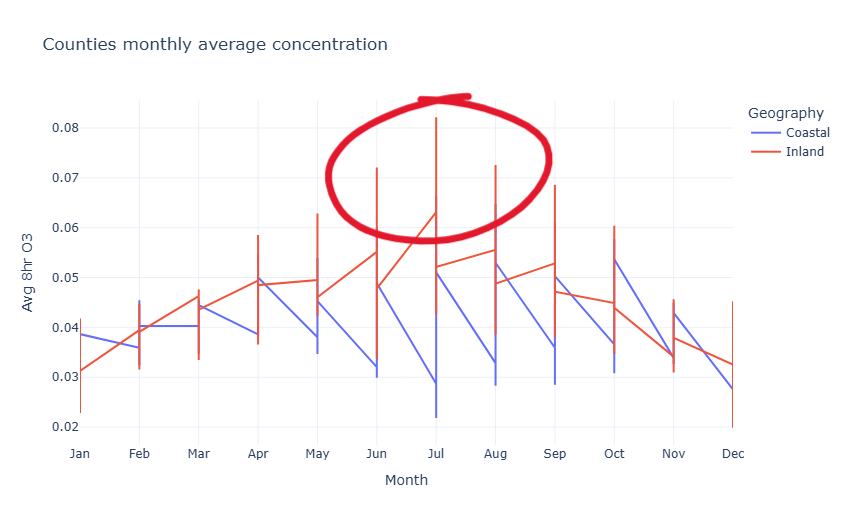

In [ ]:
rural_data = regional_stats_by_county_type.query("County_Type == 'Rural'")

avg_cv_per_county = (rural_data
                     .groupby(['County', 'Geography'])
                     ['coefficent_of_variability']
                     .mean()
                     .reset_index()
                     .sort_values('coefficent_of_variability', ascending=False))

fig = px.bar(
    avg_cv_per_county,
    x='County',
    y='coefficent_of_variability',
    color='Geography',
    title='Avg CV by Rural County',
    labels={'coefficent_of_variability': 'CV (σ/μ)'},
    template='plotly_white'
)

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig.update_layout(showlegend=True, yaxis_tickformat=".2%", xaxis_tickangle=-45)

fig.show()


In [ ]:
urban_data = regional_stats_by_county_type.query("County_Type == 'Urban'")

avg_cv_per_county = (urban_data
                     .groupby(['County', 'Geography'])
                     ['coefficent_of_variability']
                     .mean()
                     .reset_index()
                     .sort_values('coefficent_of_variability', ascending=False))

fig = px.bar(
    avg_cv_per_county,
    x='County',
    y='coefficent_of_variability',
    color='Geography',
    title='Avg CV by Urban County',
    labels={'coefficent_of_variability': 'CV (σ/μ)'},
    template='plotly_white'
)

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig.update_layout(showlegend=True, yaxis_tickformat=".2%", xaxis_tickangle=-45)

fig.show()

In [ ]:
mixed_county_data = regional_stats_by_county_type.query("County_Type == 'Mixed'")

avg_cv_per_county = (mixed_county_data
                     .groupby(['County', 'Geography'])
                     ['coefficent_of_variability']
                     .mean()
                     .reset_index()
                     .sort_values('coefficent_of_variability', ascending=False))

fig = px.bar(
    avg_cv_per_county,
    x='County',
    y='coefficent_of_variability',
    color='Geography',
    title='Avg CV by Mixed County',
    labels={'coefficent_of_variability': 'CV (σ/μ)'},
    template='plotly_white'
)

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig.update_layout(showlegend=True, yaxis_tickformat=".2%", xaxis_tickangle=-45)

fig.show()

> # **Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?**

In [ ]:
county_month_avg = regions_data.groupby(['County', 'County_Type','Month'])[
    'Daily Max 8-hour Ozone Concentration'].mean().reset_index()

In [ ]:
county_avg_ozone = county_month_avg.groupby(['County', 'County_Type'])[
    'Daily Max 8-hour Ozone Concentration'].mean().sort_values(ascending=False)

In [ ]:
top_counties = county_avg_ozone.reset_index().head(10)

In [ ]:
top_counties

,County,County_Type,Daily Max 8-hour Ozone Concentration
0,San Bernardino,Urban,0.056863
1,Riverside,Urban,0.054398
2,Tulare,Rural,0.051668
3,Kern,Urban,0.051219
4,Imperial,Rural,0.050916
5,Los Angeles,Urban,0.050877
6,Mariposa,Rural,0.049196
7,Merced,Rural,0.048648
8,Kings,Rural,0.048531
9,Fresno,Urban,0.048000


In [ ]:
fig = px.bar(
    top_counties,
    x='County',
    y='Daily Max 8-hour Ozone Concentration',
    color='County_Type',
    title='Top 10 Counties consistently high ozone levels',
    labels={'Daily Max 8-hour Ozone Concentration': 'O3 concentration',
            'County_Type': 'County Type'},
    template='plotly_white'
)

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig.update_layout(showlegend=True, yaxis_tickformat=".2%", xaxis_tickangle=-45)

fig.show()

Counties Like:

1. San Bernardino

2. Riverside

3. Kern

4. Los Angeles

5. Fresno

> ***These often show consistently high ozone levels due to urban traffic***

> *Despite their rural classification, **Tulare**, **Imperial**, and **Mariposa** exhibit urban-like ozone burdens, likely due to agricultural emissions, topographic trapping, and regional transport of pollutants. This highlights the limitations of a simple rural-urban dichotomy in air quality analysis — location, land use, and meteorology must also be considered.*

## **Do different methods report different ozone levels?**

In [ ]:
method_comparison = regions_data.groupby('Method Code')['Daily Max 8-hour Ozone Concentration'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

In [ ]:
method_comparison

,mean,std,count
Method Code,,,
53,0.061403,0.018778,378
199,0.047751,0.018744,3828
87,0.047487,0.017931,32726
47,0.044224,0.016090,7881
999,0.038070,0.015669,6141


In [ ]:
fig = px.box(
    regions_data,
    x='Method Code',
    y='Daily Max 8-hour Ozone Concentration',
    points ='all',
    color='Method Code',
    title='Methods and there ozone levels',
    labels={'Daily Max 8-hour Ozone Concentration': 'O3 concentration'},
    template='plotly_white'
)
fig.update_layout(showlegend=True, yaxis_tickformat=".2%", xaxis_tickangle=-45)

fig.show()

>**While most method codes correspond to standardized ozone measurement techniques, Method Code 999 represents an unknown or unclassified measurement method. Though it captures a similar range of ozone values, its lack of documentation limits interpretability. Therefore, any analysis involving this method should be interpreted with caution or considered separately**

> # **Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.**

In [ ]:
regions_data['Day'] = regions_data['Date'].dt.day_name()
regions_data['Is_Weekend'] = regions_data['Day'].isin(['Saturday', 'Sunday'])

In [ ]:
grouped = (regions_data
           .groupby(['County_Type', 'Is_Weekend'])['Daily Max 8-hour Ozone Concentration']
           .mean()
           .reset_index()
           .rename(columns={'Daily Max 8-hour Ozone Concentration': 'Avg_Ozone'}))


In [ ]:
fig = px.bar(grouped,
             x='County_Type',
             y='Avg_Ozone',
             color='Is_Weekend',
             barmode='group',
             title='Weekend vs Weekday Ozone Levels by County Type',
             labels={
                 'Avg_Ozone': 'Avg Max 8-hr O₃ Concentration',
                 'Is_Weekend': 'Weekend'
             },
             text_auto='.3f')

fig.update_layout(
    xaxis_title='County Type',
    yaxis_title='Avg Ozone Concentration (ppm)',
    legend_title='Weekend',
    bargap=0.3,
    template='plotly_white'
)

fig.show()

> As we can observe there is slight 0.001 differnce between weekdays and weekends in Mixed and Rural regions, ***Where as there is no change in urban regions.***

> # **Bonus: plot a geospatial heatmap showing any high ozone concentrations.**

In [ ]:
regions_data.columns

Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'Method Code',
       'CBSA Code', 'CBSA Name', 'County FIPS Code', 'County', 'Site Latitude',
       'Site Longitude', 'Month', 'Month_Number', 'County_Type', 'Geography',
       'Day', 'Is_Weekend'],
      dtype='object')

In [ ]:
# Load California counties geojson
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'
with urllib.request.urlopen(url) as response:
    counties_geojson = json.load(response)


In [ ]:
county_avg = (
    regions_data
    .groupby('County')['Daily Max 8-hour Ozone Concentration']
    .mean()
    .reset_index(name='Avg_Ozone')
)

In [ ]:
fig = px.choropleth_mapbox(
    county_avg,
    geojson=counties_geojson,
    locations='County',
    featureidkey="properties.name",  # Key in geojson that matches 'County'
    color='Avg_Ozone',
    color_continuous_scale="YlOrRd",
    mapbox_style="carto-positron",
    zoom=5.5,
    center={"lat": 37.5, "lon": -119.5},  # California center
    opacity=0.6,
    labels={'Avg_Ozone': 'Avg O₃'},
    height=700,
    title="Average Ozone Concentration by County (California)"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()
